In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pdata=pd.read_csv("pdata.csv",names=['A' + str(i + 1) for i in range(20)])
#/content/drive/MyDrive/MIS208/Project/
pdata

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
0,1,b,30.83,0.000,127,u,g,w,v,1.25,t,134.53,t,1,147.40,f,g,202,0,+
1,2,a,58.67,4.460,320,u,g,q,h,3.04,t,134.63,t,6,147.18,f,g,43,560,+
2,3,a,24.5,0.500,?,u,g,q,h,1.50,t,134.88,f,0,148.17,f,g,280,824,+
3,4,b,27.83,1.540,?,u,g,w,v,3.75,t,132.43,t,5,148.28,t,g,100,3,+
4,5,b,20.17,5.625,?,u,g,w,v,1.71,t,135.05,f,0,147.78,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,686,b,21.08,10.085,?,y,p,e,h,1.25,f,135.24,f,0,149.00,f,g,260,0,-
686,687,a,22.67,0.750,?,u,g,c,v,2.00,f,133.72,t,2,148.75,t,g,200,394,-
687,688,a,25.25,13.500,259,y,p,ff,ff,2.00,f,134.10,t,1,147.38,t,g,200,1,-
688,689,b,17.92,0.205,?,u,g,aa,v,0.04,f,136.75,f,0,146.87,f,g,280,750,-


In [ ]:
pdata.pop("A1") #python already orders the rows by default, we don't need another extra column to do that.

0        1
1        2
2        3
3        4
4        5
      ... 
685    686
686    687
687    688
688    689
689    690
Name: A1, Length: 690, dtype: int64

In [ ]:
pdata

,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
0,b,30.83,0.000,127,u,g,w,v,1.25,t,134.53,t,1,147.40,f,g,202,0,+
1,a,58.67,4.460,320,u,g,q,h,3.04,t,134.63,t,6,147.18,f,g,43,560,+
2,a,24.5,0.500,?,u,g,q,h,1.50,t,134.88,f,0,148.17,f,g,280,824,+
3,b,27.83,1.540,?,u,g,w,v,3.75,t,132.43,t,5,148.28,t,g,100,3,+
4,b,20.17,5.625,?,u,g,w,v,1.71,t,135.05,f,0,147.78,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,?,y,p,e,h,1.25,f,135.24,f,0,149.00,f,g,260,0,-
686,a,22.67,0.750,?,u,g,c,v,2.00,f,133.72,t,2,148.75,t,g,200,394,-
687,a,25.25,13.500,259,y,p,ff,ff,2.00,f,134.10,t,1,147.38,t,g,200,1,-
688,b,17.92,0.205,?,u,g,aa,v,0.04,f,136.75,f,0,146.87,f,g,280,750,-


In [ ]:
pdata.dtypes

A2      object
A3      object
A4     float64
A5      object
A6      object
A7      object
A8      object
A9      object
A10    float64
A11     object
A12    float64
A13     object
A14      int64
A15    float64
A16     object
A17     object
A18     object
A19      int64
A20     object
dtype: object

For columns that contain numerical data, if the column type is 'object', this output indicates that there are missing values in those columns. A5 obviously had missing values, but now we see that A3 and A18 have missing values too. 

In [ ]:
pdata["A5"]=pd.to_numeric(pdata["A5"],errors="coerce") #NaN for all missing values in A5, so that the column is float.
pdata["A3"]=pd.to_numeric(pdata["A3"],errors="coerce")
pdata["A18"]=pd.to_numeric(pdata["A18"],errors="coerce")

In [ ]:
pdata.isnull().sum() 

A2       0
A3      12
A4       0
A5     359
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13      0
A14      0
A15      0
A16      0
A17      0
A18     13
A19      0
A20      0
dtype: int64

Now that the columns with the missing values are floats, we can see how many actual missing values there are.

In [ ]:
pdata.pop("A5") #almost half the data is missing, this column is useless. we're better off without it.

0      127.0
1      320.0
2        NaN
3        NaN
4        NaN
       ...  
685      NaN
686      NaN
687    259.0
688      NaN
689    219.0
Name: A5, Length: 690, dtype: float64

In [ ]:
pdata

,A2,A3,A4,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
0,b,30.83,0.000,u,g,w,v,1.25,t,134.53,t,1,147.40,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,134.63,t,6,147.18,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,134.88,f,0,148.17,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,132.43,t,5,148.28,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,135.05,f,0,147.78,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,135.24,f,0,149.00,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,133.72,t,2,148.75,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,134.10,t,1,147.38,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,136.75,f,0,146.87,f,g,280.0,750,-


The amount of missing data in columns A3 and A18 are not that much, relatively 12 and 13. We can replace those values with the medians.

In [ ]:
pdata["A3"]=pdata["A3"].fillna(pdata["A3"].median())
pdata["A18"]=pdata["A18"].fillna(pdata["A18"].median())

In [ ]:
pdata.isnull().sum()

A2     0
A3     0
A4     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
A17    0
A18    0
A19    0
A20    0
dtype: int64

In [ ]:
pdata.columns=["A" + str(i+1) for i in range(len(pdata.columns))]
pdata

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18
0,b,30.83,0.000,u,g,w,v,1.25,t,134.53,t,1,147.40,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,134.63,t,6,147.18,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,134.88,f,0,148.17,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,132.43,t,5,148.28,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,135.05,f,0,147.78,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,135.24,f,0,149.00,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,133.72,t,2,148.75,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,134.10,t,1,147.38,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,136.75,f,0,146.87,f,g,280.0,750,-


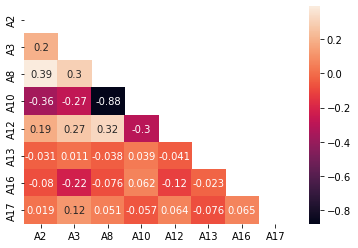

In [ ]:
mask = np.triu(np.ones_like(pdata.corr()))
sns.heatmap(pdata.corr(), annot=True,mask=mask)
plt.show()

In a dataset the correlations between columns should be low, because if they're highly correlated, there is no meaning in having both columns in both datasets. If we take a look at the correlation matrix, we can see that the highest correlation occurs between the columns A8 and A10. If we take a look at the dataset, we can see that both columns increase and decrease together. In cases like this, we can opt to remove one of the columns. 

In [ ]:
pdata.pop("A10")

0      134.53
1      134.63
2      134.88
3      132.43
4      135.05
        ...  
685    135.24
686    133.72
687    134.10
688    136.75
689    133.00
Name: A10, Length: 690, dtype: float64

In [ ]:
pdata.columns=["A" + str(i+1) for i in range(len(pdata.columns))] #re-typed so that the column names have no skips after removal.
pdata

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,147.40,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,147.18,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,148.17,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,148.28,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,147.78,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,149.00,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,148.75,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,147.38,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,146.87,f,g,280.0,750,-


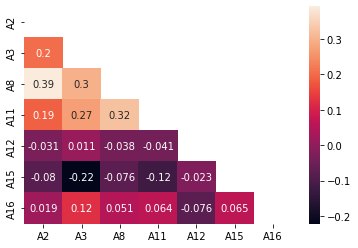

In [ ]:
mask = np.triu(np.ones_like(pdata.corr()))
sns.heatmap(pdata.corr(),annot=True,mask=mask)

In [ ]:
pdata.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12    float64
A13     object
A14     object
A15    float64
A16      int64
A17     object
dtype: object

In [ ]:
columns=pdata.columns
columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17'],
      dtype='object')

In [ ]:
for i in columns:
  if pdata.dtypes[i]=="object":
    pdata[i]=pdata[i].astype("category")

In [ ]:
pdata.dtypes

A1     category
A2      float64
A3      float64
A4     category
A5     category
A6     category
A7     category
A8      float64
A9     category
A10    category
A11       int64
A12     float64
A13    category
A14    category
A15     float64
A16       int64
A17    category
dtype: object

In [ ]:
b=pdata.select_dtypes(include=['category'])

In [ ]:
c=b.apply(lambda x: x.factorize()[0]).corr()

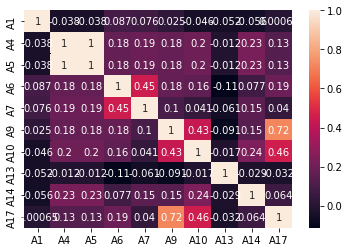

In [ ]:
sns.heatmap(c, annot=True)

In [ ]:
pdata.pop("A17")

0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: A17, Length: 690, dtype: category
Categories (2, object): ['+', '-']

In [ ]:
pdata.pop("A4")

0      u
1      u
2      u
3      u
4      u
      ..
685    y
686    u
687    y
688    u
689    u
Name: A4, Length: 690, dtype: category
Categories (4, object): ['?', 'l', 'u', 'y']

The highest correlation seems to appear on the A4 and A5 columns. It's literally 1. A9 and A17 also had high correlation, so we can delete one of those as well. So it can be wise to delete one of them. Additionally, after seeing this map, we can see that the numbers make it a little messy, so we delete them as well.

In [ ]:
pdata

,A1,A2,A3,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,g,w,v,1.25,t,t,1,147.40,f,g,202.0,0
1,a,58.67,4.460,g,q,h,3.04,t,t,6,147.18,f,g,43.0,560
2,a,24.50,0.500,g,q,h,1.50,t,f,0,148.17,f,g,280.0,824
3,b,27.83,1.540,g,w,v,3.75,t,t,5,148.28,t,g,100.0,3
4,b,20.17,5.625,g,w,v,1.71,t,f,0,147.78,f,s,120.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,p,e,h,1.25,f,f,0,149.00,f,g,260.0,0
686,a,22.67,0.750,g,c,v,2.00,f,t,2,148.75,t,g,200.0,394
687,a,25.25,13.500,p,ff,ff,2.00,f,t,1,147.38,t,g,200.0,1
688,b,17.92,0.205,g,aa,v,0.04,f,f,0,146.87,f,g,280.0,750


In [ ]:
pdata.columns=["A" + str(i+1) for i in range(len(pdata.columns))] #re-typed so that the column names have no skips after removal.
pdata

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,30.83,0.000,g,w,v,1.25,t,t,1,147.40,f,g,202.0,0
1,a,58.67,4.460,g,q,h,3.04,t,t,6,147.18,f,g,43.0,560
2,a,24.50,0.500,g,q,h,1.50,t,f,0,148.17,f,g,280.0,824
3,b,27.83,1.540,g,w,v,3.75,t,t,5,148.28,t,g,100.0,3
4,b,20.17,5.625,g,w,v,1.71,t,f,0,147.78,f,s,120.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,p,e,h,1.25,f,f,0,149.00,f,g,260.0,0
686,a,22.67,0.750,g,c,v,2.00,f,t,2,148.75,t,g,200.0,394
687,a,25.25,13.500,p,ff,ff,2.00,f,t,1,147.38,t,g,200.0,1
688,b,17.92,0.205,g,aa,v,0.04,f,f,0,146.87,f,g,280.0,750


In [ ]:
b2=pdata.select_dtypes(include=['category'])

In [ ]:
c2=b2.apply(lambda x: x.factorize()[0]).corr()

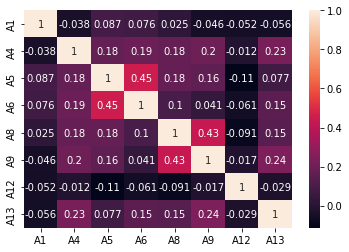

In [ ]:
sns.heatmap(c2,annot=True)

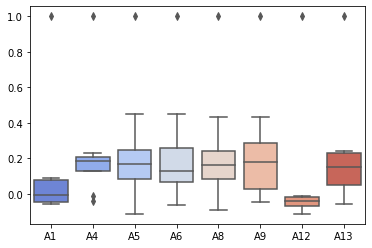

In [ ]:
sns.boxplot(data=c2, palette="coolwarm")


This boxplot is a visualization of categorical data. Actually, we do not know exactly what this data is about, so we cannot interpret it exactly.

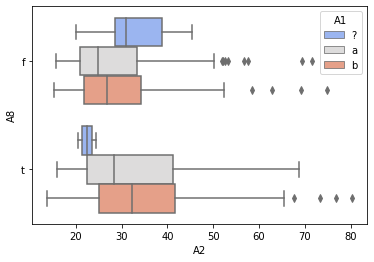

In [ ]:
sns.boxplot(x="A2",y="A8",hue="A1",data=pdata, palette="coolwarm")

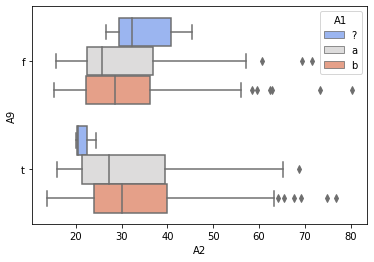

In [ ]:
sns.boxplot(x="A2",y="A9",hue="A1",data=pdata, palette="coolwarm") #These are visualizations of normal data.
